TME 1 Harb Hassan et Chrétien Clément

L'objectif du TP est d'implémenter les mesures vues en cours: moyenne, médiane, quartiles, corrélations. Le dataset concerné est un jeu de donnée qui contient le prix des 3 qualités de médicaments dans différents états d'amériques. La référence du dataset est disponible ici : https://github.com/amitkaps/weed/blob/master/1-Acquire.ipynb

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

Les données sont composées de trois fichiers:
* Le prix par date et par état (pour trois qualités différentes)
* Des informations démographiques sur chaque état
* La population de chaque état


In [3]:
prices_pd = pd.read_csv("data/Weed_Price.csv", parse_dates=[-1])
demography_pd = pd.read_csv("data/Demographics_State.csv")
population_pd = pd.read_csv("data/Population_State.csv")

## Exercice: 
* Commencez par visualiser la structure des données chargées (méthode ''head()'' et ''tail()'')

In [4]:
print prices_pd.tail(5)

               State   HighQ  HighQN    MedQ  MedQN  LowQ  LowQN       date
22894       Virginia  364.98    3513  293.12   3079   NaN    284 2014-12-31
22895     Washington  233.05    3337  189.92   3562   NaN    160 2014-12-31
22896  West Virginia  359.35     551  224.03    545   NaN     60 2014-12-31
22897      Wisconsin  350.52    2244  272.71   2221   NaN    167 2014-12-31
22898        Wyoming  322.27     131  351.86    197   NaN     12 2014-12-31


In [5]:
print demography_pd.tail(5)

           region  total_population  percent_white  percent_black  \
46       virginia           8100653             64             19   
47     washington           6819579             72              3   
48  west virginia           1853619             93              3   
49      wisconsin           5706871             83              6   
50        wyoming            570134             85              1   

    percent_asian  percent_hispanic  per_capita_income  median_rent  \
46              6                 8              33493          910   
47              7                11              30742          853   
48              1                 1              22966          448   
49              2                 6              27523          636   
50              1                 9              28902          647   

    median_age  
46        37.5  
47        37.3  
48        41.5  
49        38.7  
50        36.8  


In [6]:
print population_pd.head(10)

                 region     value
0               alabama   4777326
1                alaska    711139
2               arizona   6410979
3              arkansas   2916372
4            california  37325068
5              colorado   5042853
6           connecticut   3572213
7              delaware    900131
8  district of columbia    605759
9               florida  18885152


In [7]:
print population_pd.tail(5)

           region    value
46       virginia  8014955
47     washington  6738714
48  west virginia  1850481
49      wisconsin  5687219
50        wyoming   562803


Les types des données peuvent être récupérer à travers la méthode ''dtypes''

In [8]:
prices_pd.dtypes

State             object
HighQ            float64
HighQN             int64
MedQ             float64
MedQN              int64
LowQ             float64
LowQN              int64
date      datetime64[ns]
dtype: object

Nous allons maintenant écrire les fonctions permettant de calculer des mesures ''basiques'' sur des données unidimensionnelles. Pour cela, nous allons travailler avec la structure ''array'' de numpy. Pour convertir une colonne ''pandas'' en ''array'', voici commment faire:

In [9]:
prices_pd["MedQ"].values

array([198.64, 260.6 , 209.35, ..., 224.03, 272.71, 351.86])

## La moyenne

### Exercice: 
Ecrire la fonction moyenne(valeurs) qui calcule la moyenne des éléments d'un tableau (en utilisant la boucle ''for'', sans utiliser les fonctions déjà implémentées dans numpy)

In [10]:
def moyenne(tab):
    somme = 0
    for i in tab:
        somme += i
    return somme/len(tab)

Tester la fonction moyenne et comparer vos résultats avec l'implémentation de base de python

In [11]:
print("La moyenne (qualité moyenne) est : %f dollars (fontion python)" % prices_pd["MedQ"].mean())
print("La moyenne (qualité moyenne) est : %f dollars (notre fonction)" % moyenne(prices_pd["MedQ"]))

La moyenne (qualité moyenne) est : 247.618306 dollars (fontion python)
La moyenne (qualité moyenne) est : 247.618306 dollars (notre fonction)


### Exercice:
Calculez:
* La moyenne des prix pour les qualités medium et high
* La moyenne des prix pour les qualités medium et high dans l'état de ''New York''

Les calculs seront fait d'une part à l'aide de votre fonction, et d'autre part à l'aide des fonctions de python. 

In [12]:
print("La moyenne (qualité haute) est : %f dollars (fontion python)" % prices_pd["HighQ"].mean())
print("La moyenne (qualité haute) est : %f dollars (notre fonction)" % moyenne(prices_pd["HighQ"]))
print
print("La moyenne (qualité moyenne) est : %f dollars (fontion python)" % prices_pd["MedQ"].mean())
print("La moyenne (qualité moyenne) est : %f dollars (notre fonction)" % moyenne(prices_pd["MedQ"]))
print 
tab_NY = prices_pd[prices_pd.State=="New York"]
print("La moyenne (qualité haute) de l'état de New York est : %f dollars (fontion python)" % tab_NY["HighQ"].mean())
print("La moyenne (qualité haute) de l'état de New York est : %f dollars (notre fonction)" % moyenne(tab_NY["HighQ"].values))
print
print("La moyenne (qualité moyenne) de l'état de New York est : %f dollars (fontion python)" % tab_NY["MedQ"].mean())
print("La moyenne (qualité moyenne) de l'état de New York est : %f dollars (notre fonction)" % moyenne(tab_NY["MedQ"].values))

La moyenne (qualité haute) est : 329.759854 dollars (fontion python)
La moyenne (qualité haute) est : 329.759854 dollars (notre fonction)

La moyenne (qualité moyenne) est : 247.618306 dollars (fontion python)
La moyenne (qualité moyenne) est : 247.618306 dollars (notre fonction)

La moyenne (qualité haute) de l'état de New York est : 346.912762 dollars (fontion python)
La moyenne (qualité haute) de l'état de New York est : 346.912762 dollars (notre fonction)

La moyenne (qualité moyenne) de l'état de New York est : 265.376949 dollars (fontion python)
La moyenne (qualité moyenne) de l'état de New York est : 265.376949 dollars (notre fonction)


### Exercice
Calculez la moyenne des prix qualités medium et high dans tous les états -- la liste des états est obtenues ainsi states=np.unique(prices_pd["State"].values)

Pour cela, vous pouvez (devez) le faire de deux manières:
* Faites une boucle sur chacun des états
* Utilisez la fonction groupby comme expliqué ici : http://pandas.pydata.org/pandas-docs/stable/groupby.html

In [13]:
states= np.unique(prices_pd["State"].values)
print "Etat\t\t\t\tmoyenne prix medium\t\t\t\tmoyenne prix high"
for i in states:
    etat_courant = prices_pd[prices_pd.State==i]
    print i+"\t\t\t\t"+str(etat_courant["MedQ"].mean())+"\t\t\t\t"+str(etat_courant["HighQ"].mean())
    
print prices_pd.groupby("State")["MedQ"].mean()
print prices_pd.groupby("State")["HighQ"].mean()

Etat				moyenne prix medium				moyenne prix high
Alabama				204.6061692650334				339.5618485523386
Alaska				262.0463919821826				291.4820044543429
Arizona				209.36534521158129				300.66748329621385
Arkansas				190.4146547884187				348.0561469933185
California				191.26890868596882				245.37612472160356
Colorado				196.5325167037862				238.91870824053453
Connecticut				271.3238975501113				341.6940757238307
Delaware				231.23031180400892				366.7818485523385
District of Columbia				288.2513140311804				348.1774164810691
Florida				217.88256124721602				302.57031180400895
Georgia				215.9436302895323				326.6596436525612
Hawaii				268.73815144766144				309.9189309576838
Idaho				249.8224276169265				275.6393763919822
Illinois				284.18008908685965				355.46334075723826
Indiana				211.98951002227173				333.1911135857461
Iowa				289.9455233853007				367.09579064587973
Kansas				261.24307349665924				350.8191982182628
Kentucky				179.93376391982184				338.855167037862
Louisiana				243.117

### Exercice
Calculez la moyenne (avec les deux fonctions) sur le prix de la basse qualité. Que constatez vous ? Expliquez...

In [14]:
print("La moyenne (qualité moyenne) est : %f dollars (fontion python)" % prices_pd["LowQ"].mean())
print("La moyenne (qualité moyenne) est : %f dollars (notre fonction)" % moyenne(prices_pd["LowQ"]))

La moyenne (qualité moyenne) est : 203.747847 dollars (fontion python)
La moyenne (qualité moyenne) est : nan dollars (notre fonction)


### Exercice: 
Remplacez le NAN de la colonne LowQ à l'aide de la fonction décrite ici: http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.fillna.html. Nous souhaitons plus particulièrement utiliser la méthode ''fill'' après avoir trié par état et par date : prices_pd.sort(columns=['State', 'date'], inplace=True). Expliquez ce que cela fait exactement

In [15]:
prices_pd.sort(columns=['State', 'date'], inplace=True)
prices_pd = prices_pd.fillna(value=prices_pd["LowQ"].mean())

### Exercice: 
Recalculez la moyenne des prix pour la qualité 'Low'. Qu'en est-il maintenant ? 

In [16]:
print("La moyenne (qualité moyenne) est : %f dollars (fontion python)" % prices_pd["LowQ"].mean())
print("La moyenne (qualité moyenne) est : %f dollars (notre fonction)" % moyenne(prices_pd["LowQ"]))

La moyenne (qualité moyenne) est : 203.747847 dollars (fontion python)
La moyenne (qualité moyenne) est : 203.747847 dollars (notre fonction)


### Exercice :
Dessinez l'histogramme des moyennes des prix (LowQ) par etat. Pour cela, inspirez vous de http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

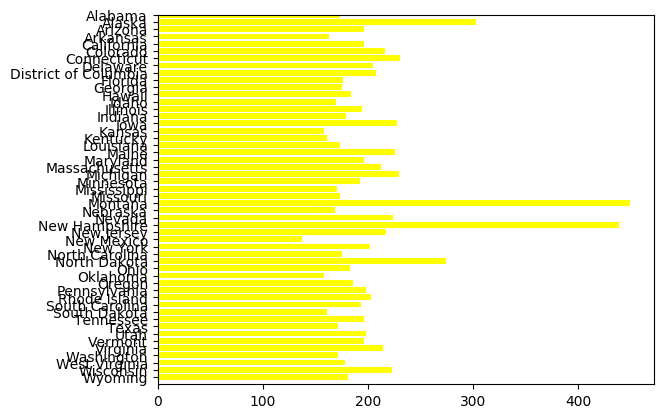

In [17]:
plt.rcdefaults()
fig, ax = plt.subplots()
states = np.unique(prices_pd["State"].values)
state = []
moyenne_low = []
for i in states:
    etat_courant = prices_pd[prices_pd.State==i]
    state.append(i)
    moyenne_low.append(etat_courant["LowQ"].mean())
x_pos = np.arange(len(moyenne_low))
ax.barh(x_pos, moyenne_low, color='yellow')
ax.set_yticks(x_pos)
ax.set_yticklabels(state)
plt.ylim(51, 0)
plt.show()

## Estimation de densité

Nous allons maintenant nous intéresser à calculer le nombre d'états concernés par une fourchette de prix. Pour cela:
* Calculer le tableau des prix moyens de la facon suivante
    


In [18]:
prix_moyens=prices_pd[["State","LowQ"]].groupby(["State"]).mean()
#print(prix_moyens)
#print("===========")
prix_moyens=prix_moyens.values.ravel()
#print(prix_moyens)

### Exercice : 
* Calculez les valeurs min et max des prix moyens

In [19]:
print "Le minimum est :", min(prix_moyens)
print "Le maximum est :", max(prix_moyens)

Le minimum est : 137.53098968376693
Le maximum est : 449.57631262363685


### Exercice : 
Prenez un intervalle de discrétisation de taille 20, et calculez l'effectif (sous forme d'un vecteur) du nombre d'états par ''bins''. Dessinez l'histogramme correspondant

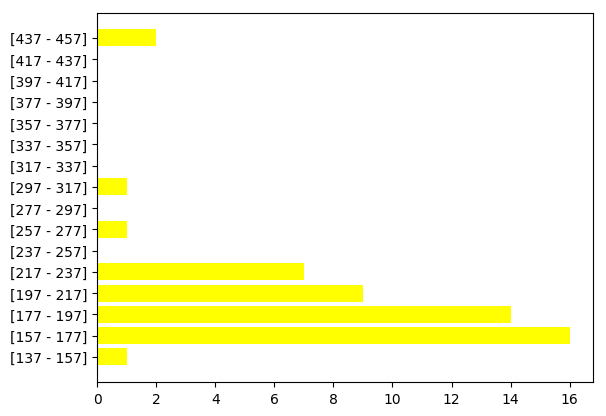

In [20]:
boite=[]
for i in range(int(min(prix_moyens))+20, int(max(prix_moyens))+20, 20):
    petite_boite = 0
    for j in prix_moyens:
        if j <= i and j >= i-20:
            petite_boite += 1
    boite.append(petite_boite)

plt.rcdefaults()
fig, ax = plt.subplots(1,1)
nom_boite= []
for i in range(137,458,20):
    nom_boite.append("["+str(i)+" - "+str(i+20)+"]")
x_pos = np.arange(len(boite))
ax.barh(x_pos, boite, color='yellow')
ax.set_yticks(x_pos)
ax.set_yticklabels(nom_boite)
plt.show()

### Exercice :
Prenez maintenant un intervalle de taille 40

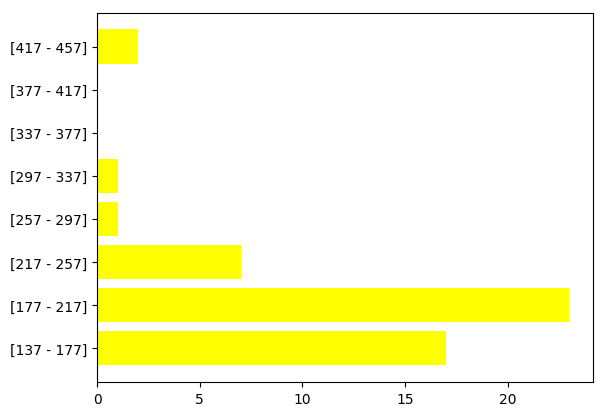

In [21]:
boite=[]
for i in range(int(min(prix_moyens))+40, int(max(prix_moyens))+40, 40):
    petite_boite = 0
    for j in prix_moyens:
        if j <= i and j >= i-40:
            petite_boite += 1
    boite.append(petite_boite)

plt.rcdefaults()
fig, ax = plt.subplots(1,1)
nom_boite= []
for i in range(137,437+40,40):
    nom_boite.append("["+str(i)+" - "+str(i+40)+"]")
x_pos = np.arange(len(boite))
ax.barh(x_pos, boite, color='yellow')
ax.set_yticks(x_pos)
ax.set_yticklabels(nom_boite)
plt.show()

On peut faire cela de la manière suivante avec pandas

In [22]:
effectif=pd.cut(prix_moyens,20)
effectif2=pd.value_counts(effectif)
effectif3=effectif2.reindex(effectif.levels)
effectif3.plot(kind='bar')

/users/Etu5/3774365/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


Et comme cela avec numpy

In [23]:
plt.hist(prix_moyens,bins=20)

(array([ 1.,  6., 15., 11.,  6.,  8.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([137.53098968, 153.13325583, 168.73552198, 184.33778812,
        199.94005427, 215.54232042, 231.14458657, 246.74685271,
        262.34911886, 277.95138501, 293.55365115, 309.1559173 ,
        324.75818345, 340.36044959, 355.96271574, 371.56498189,
        387.16724804, 402.76951418, 418.37178033, 433.97404648,
        449.57631262]),
 <a list of 20 Patch objects>)

L'estimation de densité en pandas peut se faire ainsi

In [24]:
effectif=pd.DataFrame(prix_moyens)
effectif.plot(kind='kde')

## Densité cumulée

### Exercice: 
Calculez la densité cumulée à partir de prix_moyens, avec un intervalle de discrétisation donné et dessinez. La méthode doit retourner deux tableau: l'abscisse X (les prix moyens possibles entre prix min et prix max), et la densité associée

(137.219, 153.133]     1
(153.133, 168.736]     7
(168.736, 184.338]    22
(184.338, 199.94]     33
(199.94, 215.542]     39
(215.542, 231.145]    47
(231.145, 246.747]    47
(246.747, 262.349]    47
(262.349, 277.951]    48
(277.951, 293.554]    48
(293.554, 309.156]    49
(309.156, 324.758]    49
(324.758, 340.36]     49
(340.36, 355.963]     49
(355.963, 371.565]    49
(371.565, 387.167]    49
(387.167, 402.77]     49
(402.77, 418.372]     49
(418.372, 433.974]    49
(433.974, 449.576]    51
dtype: float64


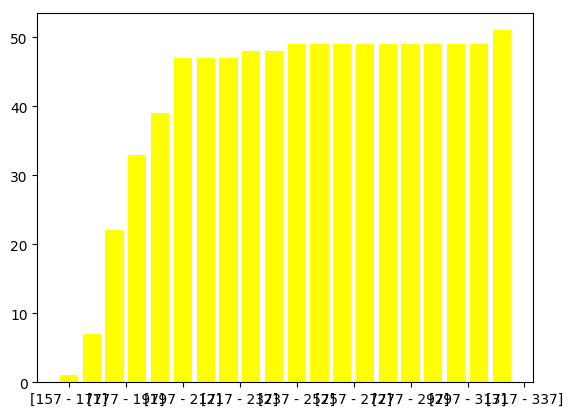

In [42]:
def densite_cumule(p, inter):
    effectif=pd.cut(p,inter)
    effectif2=pd.value_counts(effectif)
    effectif3=effectif2.reindex(effectif.levels)
    for i in range(len(effectif3)):
        if np.isnan(effectif3[i]):
            effectif3[i] = 0
        if i > 0:
            effectif3[i] += effectif3[i-1] 
    print effectif3
    plt.rcdefaults()
    fig, ax = plt.subplots(1,1)
    nom_boite= []
    for i in range(137,437+inter,inter):
        nom_boite.append("["+str(i)+" - "+str(i+inter)+"]")
    x_pos = np.arange(len(effectif3))
    ax.bar(x_pos, effectif3, color='yellow')
    ax.set_xticklabels(nom_boite)
    plt.show()
    
densite_cumule(prix_moyens, 20)
    

### Exercice : 
Ecrire la fonction Q(alpha,x,y) qui permet de trouver le quartile(alpha,x,y) - quartile(0.5,x,densite) correspondra à la médiane. Calculez et dessinez (sur une feuille) le boxplot

Le boxplot en pandas se fait ainsi:

In [43]:
a=pd.DataFrame(prix_moyens)
a.boxplot()

/usr/lib/python2.7/dist-packages/pandas/tools/plotting.py:2380: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


{'boxes': [<matplotlib.lines.Line2D at 0x7f68e1c41d10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f68e1c41cd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f68e1c4dcd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f68e1c4d9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f68e1c41650>,
  <matplotlib.lines.Line2D at 0x7f68e1c41b50>]}

## Variance

### Exercice : 
On souhaite maintenant rajouter une colonne ''HighQ_var'' aux données originales contenant la variance des prix par état. ATTENTION, cela suppose de traiter les états (State) les uns après les autres

In [52]:
var_state = []
states= np.unique(prices_pd["State"].values)
for i in states:
    etat_courant = prices_pd[prices_pd.State==i]
    var_state.append(sum((j - etat_courant["HighQ"].mean())**2 for j in etat_courant["HighQ"])/len(etat_courant["HighQ"]))
print var_state

[2.3654694113620494, 31.068218253877653, 4.054197897827884, 47.03699250400554, 2.976043334110453, 6.342560469442114, 18.331655326114465, 24.772389233188346, 3.9680623677461933, 5.246545559793838, 13.370709895288202, 9.448169903919117, 0.8385639763691674, 5.777760776980273, 3.4458170227330265, 7.858185176660818, 3.9425124974578436, 1.0725933462631654, 23.725228297478708, 22.017006228143735, 34.81368822376871, 12.712531804901756, 18.408800405751943, 78.87524741047913, 7.293090806097201, 54.650898489590844, 10.943423708215757, 30.352202478162265, 1.8448786067529417, 51.004924595612195, 12.805187780814594, 6.412755691688042, 12.21787522383322, 16.27492165812669, 55.57066169612251, 2.6924974866196147, 31.75860149701639, 7.544846634689317, 12.837811620974092, 44.71465697193955, 14.880762311694882, 138.0545344546905, 14.806993409754902, 16.133560367260085, 4.265720094642379, 12.853054590006993, 11.836045525567824, 1.344088777337413, 8.229870245683314, 11.718480303173083, 219.12338046140658]


## Synthèse : La californie

### Exercice : 
Pandas permet de faire la synthèse de données de la manière suivante: 
data.describe()
* Vérifier que les valeurs trouvée sur l'état de la californie collent avec les valeurs trouvées par vos différentes méthodes. 
** Pour cela: mettez le code qui utilise vos fonctions (moyennes, variance, et quartiles) ainsi que le résutlats de la fonction describe

## Matrice de corrélation

### Exercice: 

Nous allons maintenant nous intéresser à calculer la corrélation entre les prix à new-york et les prix en californie
* Commencez par dessinez le nuage des points des prix(par date) en californie (axe x) et à new york (axe y) pour la bonne qualité. Pour cela on va d'abord créer un DataFrame avec le prix de californie et de new york par date

In [55]:
prix_ny=prices_pd[prices_pd['State']=='New York']
prix_ca=prices_pd[prices_pd['State']=='California']
prix_ca_ny=prix_ca.merge(prix_ny,on='date')
prix_ca_ny.head()


,State_x,HighQ_x,HighQN_x,MedQ_x,MedQN_x,LowQ_x,LowQN_x,date,State_y,HighQ_y,HighQN_y,MedQ_y,MedQN_y,LowQ_y,LowQN_y
0,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,New York,351.98,5773,268.83,5786,190.31,479
1,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,New York,351.92,5775,268.83,5786,190.31,479
2,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,New York,351.99,5785,269.02,5806,190.75,480
3,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,New York,352.02,5791,268.98,5814,190.75,480
4,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,New York,351.97,5794,268.93,5818,190.75,480


### Exercice

Dessinez le nuage de points : voir http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html

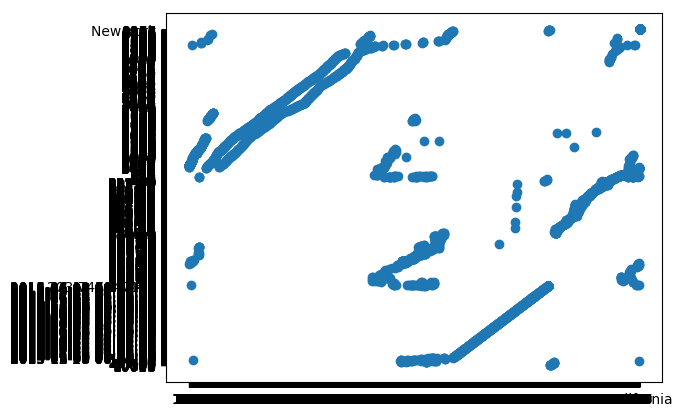

In [58]:
plt.scatter(prix_ca, prix_ny)
plt.show()

### Exercice

A l'aide de la fonction moyenne écrite précédemment, écrire une fonction correlation(x,y) qui calcule la correlation lineaire entre deux tableaux numpy

In [ ]:
print("La correlation est :%f"%correlation(prix_ca_ny["HighQ_x"].values,prix_ca_ny["HighQ_y"].values))

### Exercice: 

Calculez la matrice des correlations pour toutes les combinaisons d'états

## Exercice: 
* Calculez les correlations entre le prix (low et high) en fonction du revenu moyen par etat disponible dans le tableau demography_pd chargé au début
* que pouvez vous en conclure

## Travail pour la fin de TP + Maison
Travail de rendu (à faire avant le prochain TP):
* Vous avez implémenté et vu comment calculer tout un ensemble d'indicateurs statistiques assez simples. 
* Vous avez vu comment produire de jolis graphiques

## Travail à faire : proposez une analyse originale a l'aide des données disponibles ici : http://opendata.paris.fr et des indicateurs/graphiques vus en cours et aujourd'hui
* Voir  http://matplotlib.org/gallery.html pour les visualisations

#### Exemple : 
* (Récupération de données: ) Téléchargez les données ici : http://opendata.paris.fr/explore/dataset/liste_des_prenoms_2004_a_2012/?disjunctive.prenoms&disjunctive.annee
* Calculez l'histogramme et la densité des différents prénoms 
* Proposez une visualisation des 10 prénoms les plus donnés chaque année
* Calculer les corrélations entre prénoms pour dégager les listes de prénoms corrélés et anti-corrélés dans le temps. Illuster les plus fortes corrélations par des nuages de points
* ==> Proposez un nuage de mots à partir des données extraites (outil possible: https://www.jasondavies.com/wordcloud/ ou  https://github.com/mbostock/d3/wiki/Gallery)



    